In [84]:
#For Both Class Classification and Regression {CART}
# GINI Impurrity [0 , 0.5] ,  0 = Perfect Purity {faster than id3}
# id3 Iterative Dichotomizer uses Entropy and Information Gain {old}
# entropy 1 -> Maximum Uncertainity {Mixed Class}    {0 , 1}
# entropy 0 -> Perfectly Pure {all Sample from one class}

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [106]:
df = pd.read_csv('/content/heart (2).csv')  #{Predicts wheather the Patient has Heart Disease or Not}

In [107]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [88]:
# age = It is the age of patient
# sex = It is Gender of the patient ( 0 for female , 1 for male )
# cp = Chest pain of patient ( 1 level , 2 level )
# trestbps = Blood pressure in resting condition
# chol = cholesterol level at admission at hospital
# fbs = Fasting blood sugar level
# restecg = ECG ( Electrocardio graphy ) level at resting
# thalach = Maximm heart rate achieved during the test
# exang =  Exercise Induced angina  ( Facing any discomfor or not)
# oldpeak = How much ECG changes dusring exercise as compared to rest
# slope = Slope of ECG or ST changes
# ca ( coronary artery ) = The number of major blood vessels ( 0-3)  colored by fluoroscopy
# thal ( thalassemia) = A blood disorder that can damage your heart


# target = whether a patient is having heart disease or not , 1 for Yes , 0 for No

In [89]:
df.shape

(303, 14)

In [108]:
# check in target column how many people will suffer or not

df['target'].value_counts()
# 1-> suffering
# 2-> Not Suffering

,count
target,
1,165
0,138


In [109]:
# report of all the columns and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [110]:
# Step 4 (Data cleaning)

'''
1) check for null values
2) check for duplicate values
3) check for outliers
'''

# check for null values

df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [61]:
# null values in numerical column -> replace them with mean / median
# null values in string column -> replace them with mode

In [111]:
# check for duplicate values

df.duplicated().sum()

np.int64(1)

In [112]:
df.drop_duplicates(inplace = True)

In [113]:
df.duplicated().sum()

np.int64(0)

In [65]:
# check the outliers

# first create a list with all the column names
col = list(df.columns)
col

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

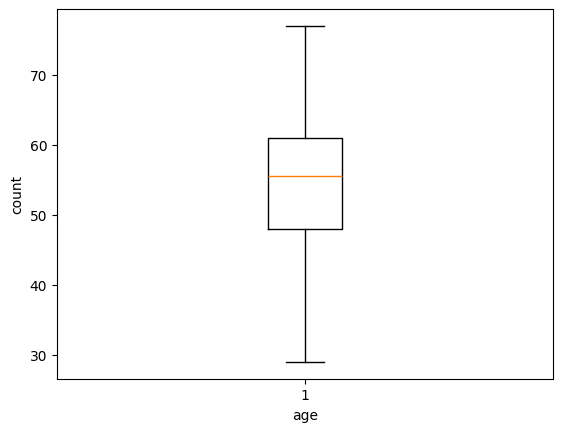

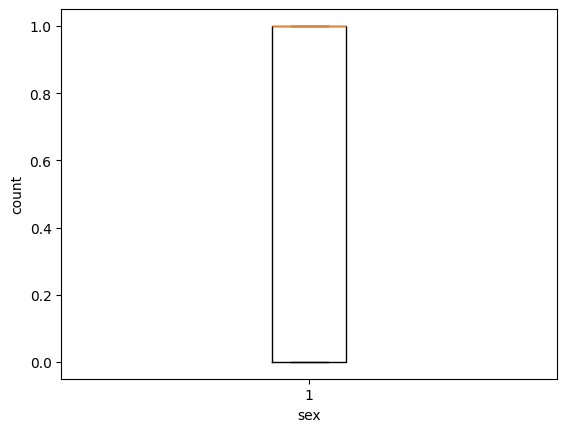

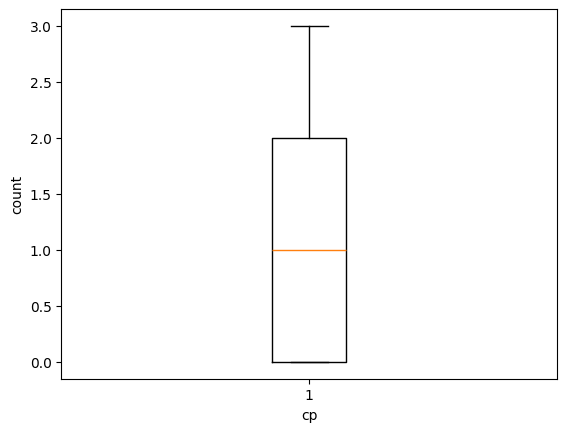

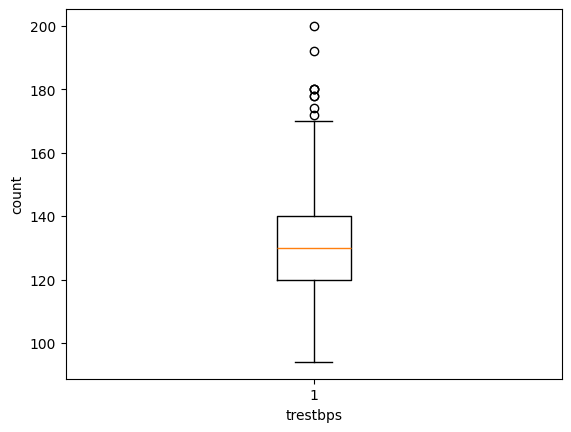

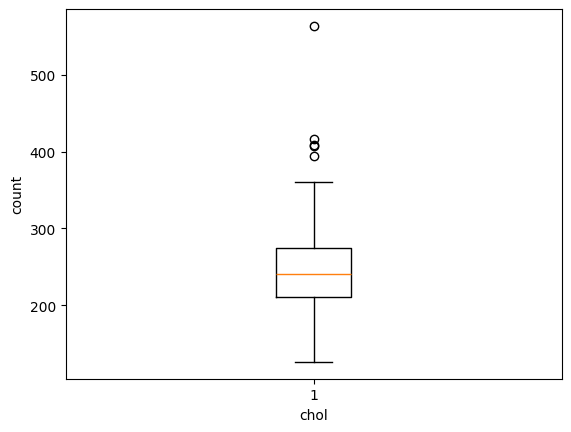

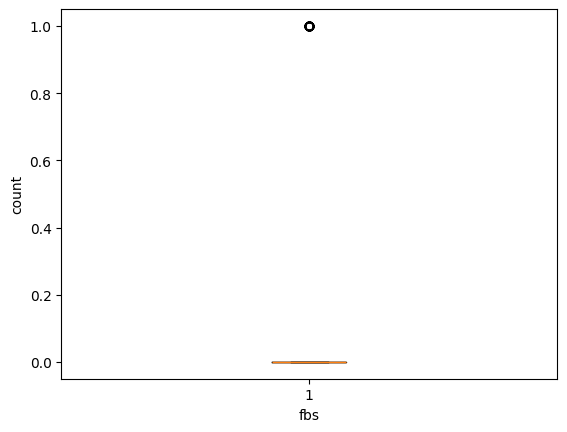

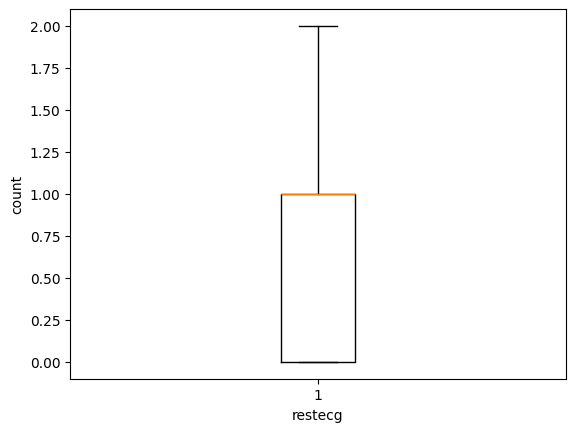

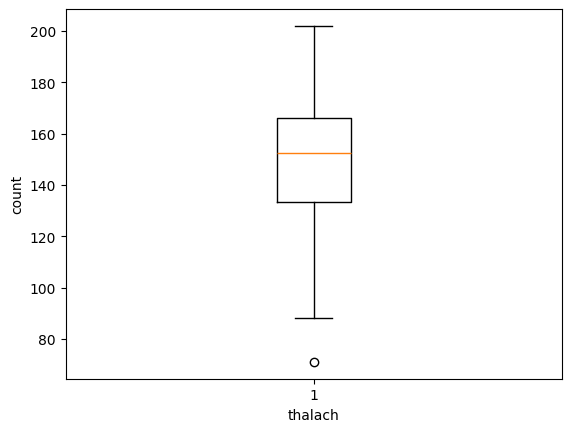

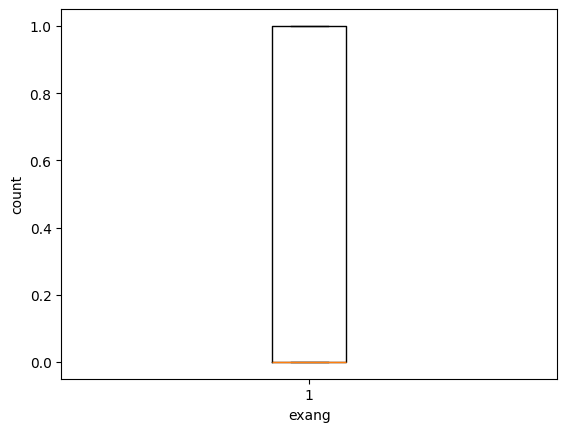

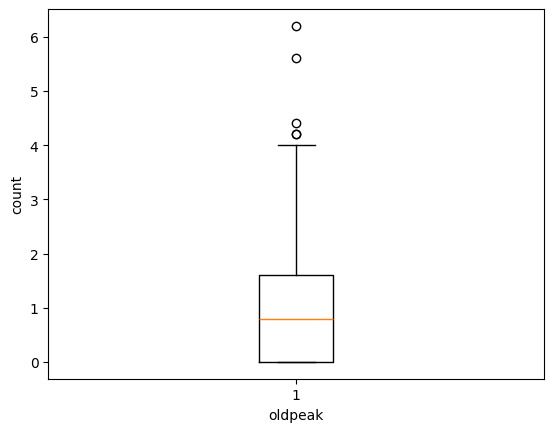

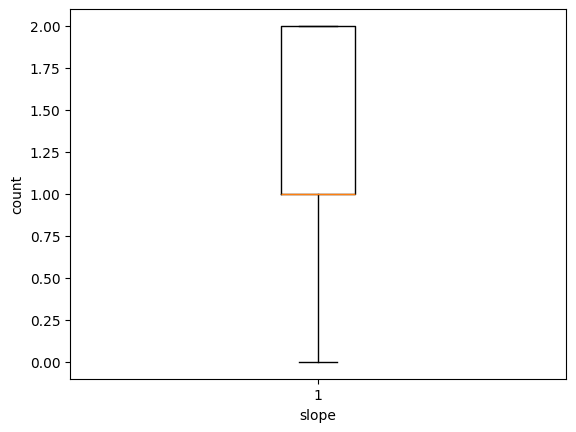

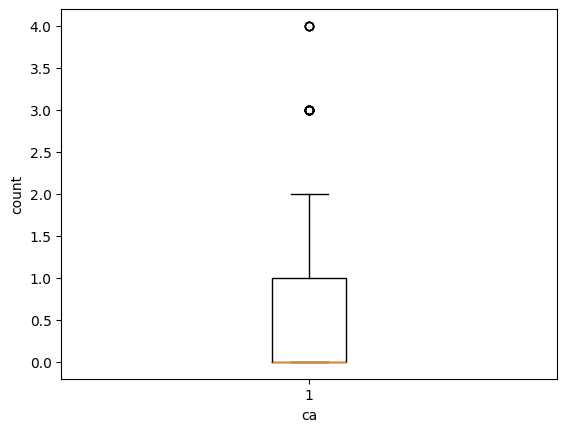

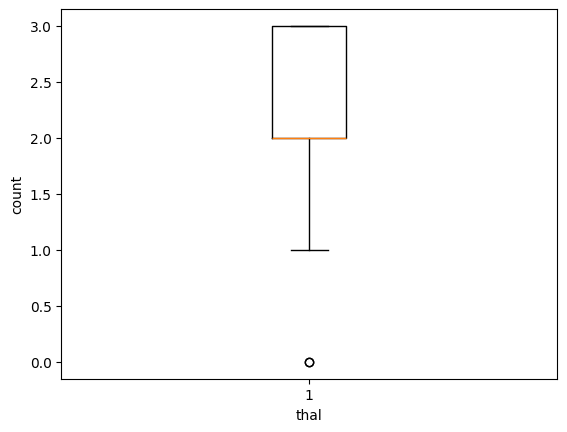

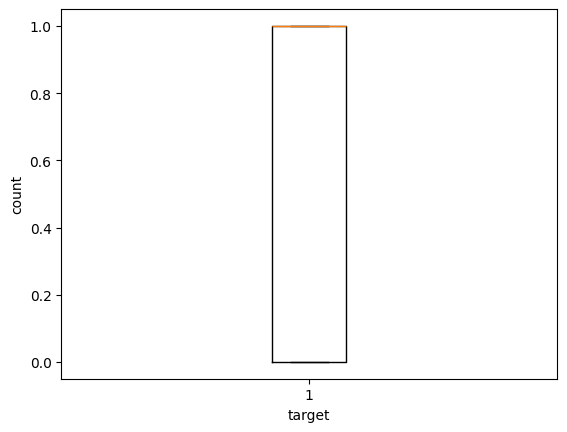

In [66]:
for i in col:
  if (df[i].dtypes == 'int64' or df[i].dtypes == 'float64'):
    plt.boxplot(df[i])
    plt.xlabel(i)
    plt.ylabel('count')
    plt.show()

In [67]:
# As tree algorithms don't have much impact of outliers then we can skip outlier removal part

<Axes: >

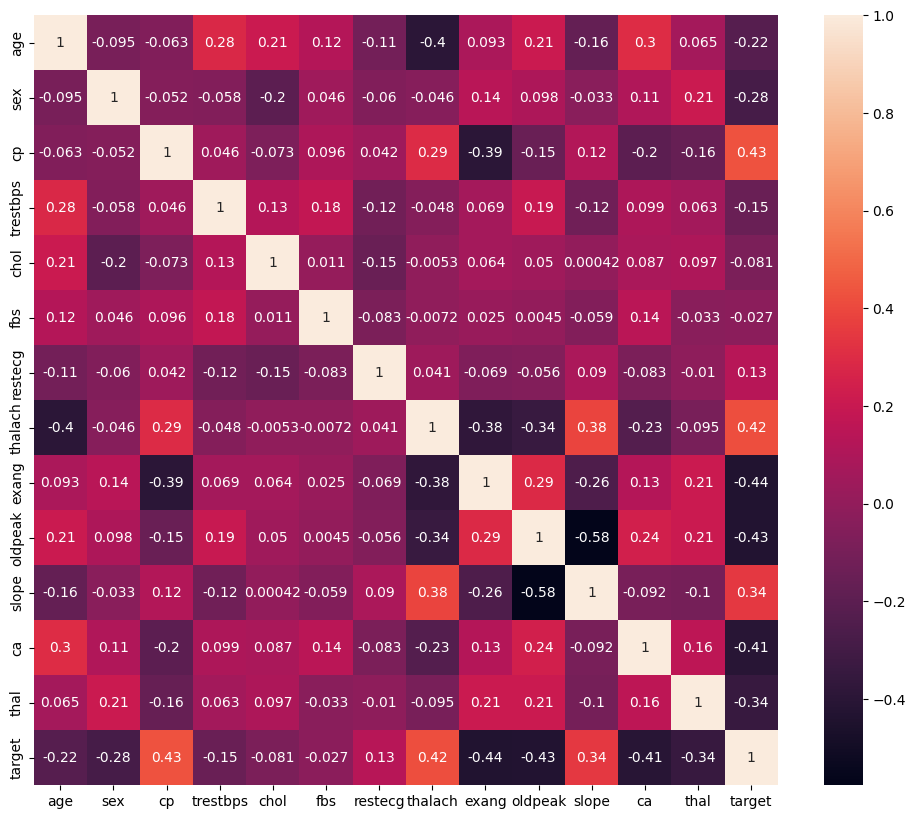

In [114]:
# check for correlation whether is there any high correlation

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot = True)


In [115]:
# step -5 (Model Building part)

from sklearn.model_selection import train_test_split # Splitting the dataset into train and test sets

from sklearn.metrics import * # To evalaute the model performance

from sklearn.tree import DecisionTreeClassifier

In [116]:
# Divide the data into independent variables and dependent variables

x = df.drop(columns = ['target']) # All the columns except the target column in independent variable x

y = df['target'] # dependent target variable

In [117]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [118]:
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [119]:
x_train,x_test,y_train,y_test = train_test_split(x , y, test_size = 0.2,random_state = 60)

In [74]:
'''
Train means: Student is **learning** from study material (past examples).
Test means: Student is **evaluated** on new questions never seen before.

model = Student (learns during training, answers during testing)

x_train = Training Questions (features/input) → The material the student reads
y_train = Training Answers (labels/output) → The correct answers the student learns

x_test = Testing Questions (features/input) → New questions asked in the test
y_test = Testing Answers (labels/output) → Correct answers to compare against student's answers
'''

"\nTrain means: Student is **learning** from study material (past examples).\nTest means: Student is **evaluated** on new questions never seen before.\n\nmodel = Student (learns during training, answers during testing)\n\nx_train = Training Questions (features/input) → The material the student reads\ny_train = Training Answers (labels/output) → The correct answers the student learns\n\nx_test = Testing Questions (features/input) → New questions asked in the test\ny_test = Testing Answers (labels/output) → Correct answers to compare against student's answers \n"

In [120]:
x_train # Independent variable of training

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
255,45,1,0,142,309,0,0,147,1,0.0,1,3,3
222,65,1,3,138,282,1,0,174,0,1.4,1,1,2
35,46,0,2,142,177,0,0,160,1,1.4,0,0,2
273,58,1,0,100,234,0,1,156,0,0.1,2,1,3
230,47,1,2,108,243,0,1,152,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2
99,53,1,2,130,246,1,0,173,0,0.0,2,3,2
70,54,1,2,120,258,0,0,147,0,0.4,1,0,3
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2


In [76]:
y_train # dependent vraiable of training

,target
132,1
203,0
197,0
75,1
177,0
...,...
189,0
71,1
106,1
271,0


In [121]:
x_test # Independent variable of testing

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
150,66,1,0,160,228,0,0,138,0,2.3,2,0,1
90,48,1,2,124,255,1,1,175,0,0.0,2,2,2
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2
33,54,1,2,125,273,0,0,152,0,0.5,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,57,1,0,110,201,0,1,126,1,1.5,1,0,1
262,53,1,0,123,282,0,1,95,1,2.0,1,2,3
149,42,1,2,130,180,0,1,150,0,0.0,2,0,2
23,61,1,2,150,243,1,1,137,1,1.0,1,0,2


In [78]:
y_test # dependent variable of testing

,target
180,0
229,0
111,1
247,0
60,1
...,...
250,0
104,1
300,0
194,0


In [101]:
model = DecisionTreeClassifier()

In [122]:
''' model.fit(x_train, y_train) → Student studies '''
# Train the model
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [123]:
y_pred = model.predict(x_test)  # Test out the model

In [124]:
y_pred  # answers given by the model

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0])

In [125]:
accuracy_score(y_pred,y_test)*100

83.60655737704919

In [127]:
cm = confusion_matrix(y_pred , y_test)

cm

array([[20,  6],
       [ 4, 31]])